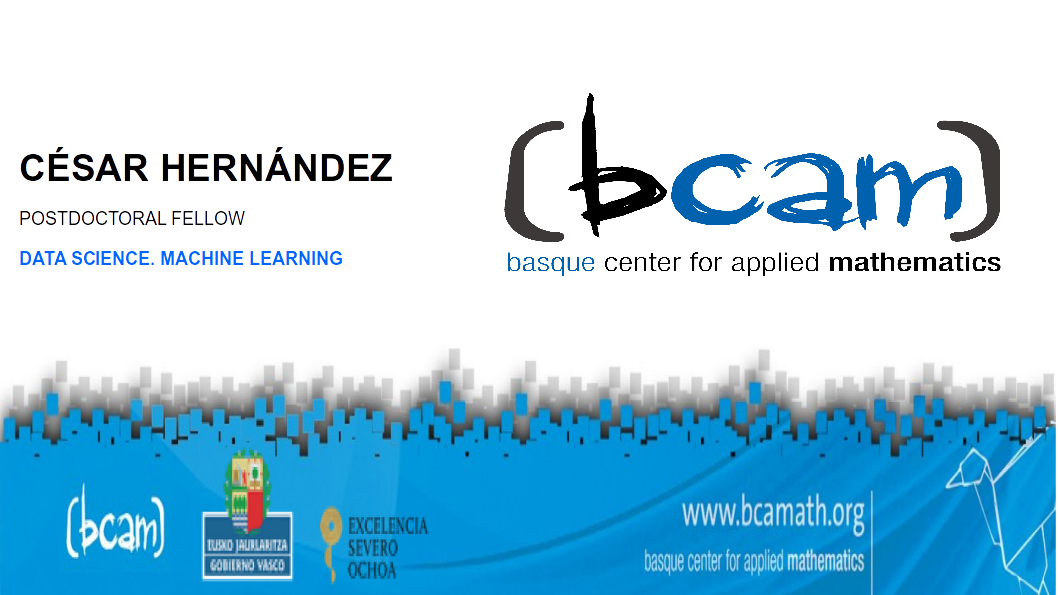

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import time
import datetime

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
#%%   DIRECTORIO SOBRE EL QUE SE VA A TRABAJAR
ruta="/home/chernandez/Desktop/Nancy_Encuestas/"
path=ruta+"datos"
os.chdir(path)

In [3]:
#%% DIRECTORIO EN EL QUE SE VAN A GUARDAR LAS IMAGENES
#pathFiguresPDF="/home/chernandez/BCAM/PROYECTOS/LagunAro/2019-LAGUNARO-CESAR-HDEZ/Figures/PDF"
#pathFiguresPNG="/home/chernandez/BCAM/PROYECTOS/LagunAro/2019-LAGUNARO-CESAR-HDEZ/Figures/PNG"

In [4]:
#%% CARGAR DATOS
data=pd.read_excel('Resiliencia.xlsx', index_col=None, header=0)

In [5]:
data.head(3)

,No. Caso,Género,Edo. Civil,Vivienda,Decisión,Recurse,Satisfacción,r1,r2,r3,...,r34,r35,r36,r37,r38,r39,r40,r41,r42,r43
0,1,20,1,2,1,1,2,1,1,1,...,3,2,1,3,2,3,3,1,1,1
1,2,21,1,2,2,0,2,5,3,5,...,4,4,4,4,4,4,4,4,4,4
2,1,20,1,2,1,0,4,5,5,5,...,5,5,5,5,5,4,4,5,5,5


### Se cuentan la cantidad de instancias, variables

In [6]:
print('La cantidad de instancias es:', data.shape[0])
print('La cantidad de columnas es:', data.shape[1])

La cantidad de instancias es: 122
La cantidad de columnas es: 50


### Se enlistan los nombres de las columnas y se agregan a un dataframe, estos nombres después serán usados al saber las variables que más influencia tienen en el proceso

In [7]:
listaColumna=[]

for col in data.columns:
    #print(col)
    listaColumna.append(col)

In [8]:
DataColumnas=pd.DataFrame(columns=['Nombre'])
DataColumnas['Nombre']=listaColumna
DataColumnas

,Nombre
0,No. Caso
1,Género
2,Edo. Civil
3,Vivienda
4,Decisión
5,Recurse
6,Satisfacción
7,r1
8,r2
9,r3


In [9]:
Clases=data['CLASE'].value_counts()
DataClases=pd.DataFrame(columns=['Cantidad'])
DataClases['Cantidad']=Clases
DataClases.reset_index(level=0, inplace=True)
DataClases.columns=['Clase','Cantidad']
DataClases = DataClases.sort_values(by='Clase', ascending=True)
DataClases

,Clase,Cantidad
0,0,350700
1,1,19814
2,2,1003
3,3,84
4,4,6


In [10]:
DataClases["Cantidad"].sum()

371607

In [11]:
colorFigura="cornflowerblue"

In [12]:
def snsbarFigure(variableX,variableY,dataset,colorFigura,xlabel,ylabel,nombreFigura):
    fig =plt.figure(figsize=(20, 6))
    sns.barplot(x=variableX, y=variableY, data=dataset, color=colorFigura);
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.show()

    fig.savefig(os.path.join(pathFiguresPDF,nombreFigura+'.pdf'))
    fig.savefig(os.path.join(pathFiguresPNG,nombreFigura+'.png'))

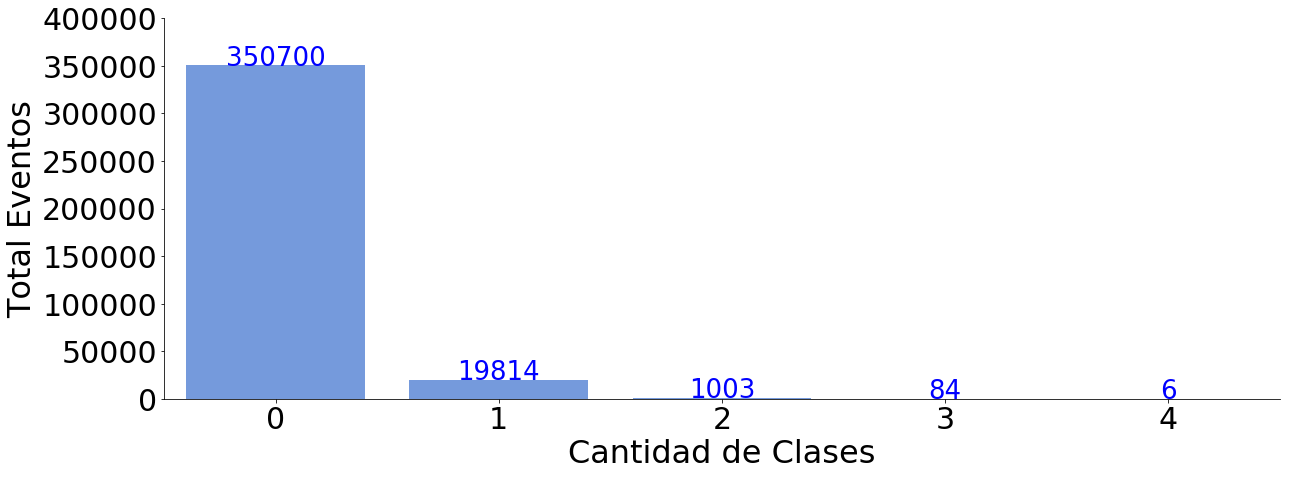

In [13]:
fig =plt.figure(figsize=(20, 7))
g=sns.barplot(x="Clase", y="Cantidad", data=DataClases, color=colorFigura);
plt.xlabel('Cantidad de Clases',fontsize=32)
plt.ylabel('Total Eventos',fontsize=32)
#plt.title('Histograma de kWh',fontsize=22)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

sns.despine()

axes = g.axes
axes.set_ylim(0,400000)

for index, row in DataClases.iterrows():
    g.text(row.Clase,row.Cantidad+100, str(row.Cantidad), color='blue', ha="center", fontsize=26)
    
plt.show()

fig.savefig(os.path.join(pathFiguresPDF,'barras_Clases.pdf'))
fig.savefig(os.path.join(pathFiguresPNG,'barras_Clases.png'))

# Subconjuntos de las CLASES

In [14]:
X=data.drop(['CLASE'], axis=1)
y = data['CLASE']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, stratify=y)

In [20]:
y_train.value_counts()

0    175350
1      9907
2       501
3        42
4         3
Name: CLASE, dtype: int64

In [21]:
y_val.value_counts()

0    175350
1      9907
2       502
3        42
4         3
Name: CLASE, dtype: int64

In [14]:
dataCLASE0 = data[data['CLASE'] == 0] 
dataCLASE1 = data[data['CLASE'] == 1] 
dataCLASE2 = data[data['CLASE'] == 2] 
dataCLASE3 = data[data['CLASE'] == 3] 
dataCLASE4 = data[data['CLASE'] == 4] 

In [15]:
valor=2 # 50 por ciento
#valor=3 # 66 por ciento

In [16]:
porcentaje_clase0=int(len(dataCLASE0)/valor)
porcentaje_clase0

175350

In [17]:
dataCLASE0_SUB_A = dataCLASE0.iloc[0:porcentaje_clase0]
dataCLASE0_SUB_B = dataCLASE0.iloc[porcentaje_clase0:]

In [18]:
porcentaje_clase1=int(len(dataCLASE1)/valor)
porcentaje_clase1

9907

In [19]:
dataCLASE1_SUB_A = dataCLASE1.iloc[0:porcentaje_clase1]
dataCLASE1_SUB_B = dataCLASE1.iloc[porcentaje_clase1:]

In [20]:
porcentaje_clase2=int(len(dataCLASE2)/valor)
porcentaje_clase2

501

In [21]:
dataCLASE2_SUB_A = dataCLASE2.iloc[0:porcentaje_clase2]
dataCLASE2_SUB_B = dataCLASE2.iloc[porcentaje_clase2:]

In [22]:
porcentaje_clase3=int(len(dataCLASE3)/valor)
porcentaje_clase3

42

In [23]:
dataCLASE3_SUB_A = dataCLASE3.iloc[0:porcentaje_clase3]
dataCLASE3_SUB_B = dataCLASE3.iloc[porcentaje_clase3:]

In [24]:
porcentaje_clase4=int(len(dataCLASE4)/valor)
porcentaje_clase4

3

In [25]:
dataCLASE4_SUB_A = dataCLASE4.iloc[0:porcentaje_clase4]
dataCLASE4_SUB_B = dataCLASE4.iloc[porcentaje_clase4:]

# Conjuntos Train y Test

In [26]:
#%% SE CONCATENA
dataTRAIN_0=pd.concat([dataCLASE0_SUB_A,dataCLASE1_SUB_A])
dataTRAIN_1=pd.concat([dataTRAIN_0,dataCLASE2_SUB_A])
dataTRAIN_2=pd.concat([dataTRAIN_1,dataCLASE3_SUB_A])
dataTRAIN=pd.concat([dataTRAIN_2,dataCLASE4_SUB_A])

dataTEST_0=pd.concat([dataCLASE0_SUB_B,dataCLASE1_SUB_B])
dataTEST_1=pd.concat([dataTEST_0,dataCLASE2_SUB_B])
dataTEST_2=pd.concat([dataTEST_1,dataCLASE3_SUB_B])
dataTEST=pd.concat([dataTEST_2,dataCLASE4_SUB_B])

In [27]:
dataTRAIN.to_csv('DataBaseCartera_TRAIN.csv')
dataTEST.to_csv('DataBaseCartera_TEST.csv')

In [28]:
ClasesTRAIN=dataTRAIN['CLASE'].value_counts()
DataClasesTRAIN=pd.DataFrame(columns=['Cantidad'])
DataClasesTRAIN['Cantidad']=ClasesTRAIN
DataClasesTRAIN.reset_index(level=0, inplace=True)
DataClasesTRAIN.columns=['Clase','Cantidad']
DataClasesTRAIN = DataClasesTRAIN.sort_values(by='Clase', ascending=True)
DataClasesTRAIN

,Clase,Cantidad
0,0,175350
1,1,9907
2,2,501
3,3,42
4,4,3


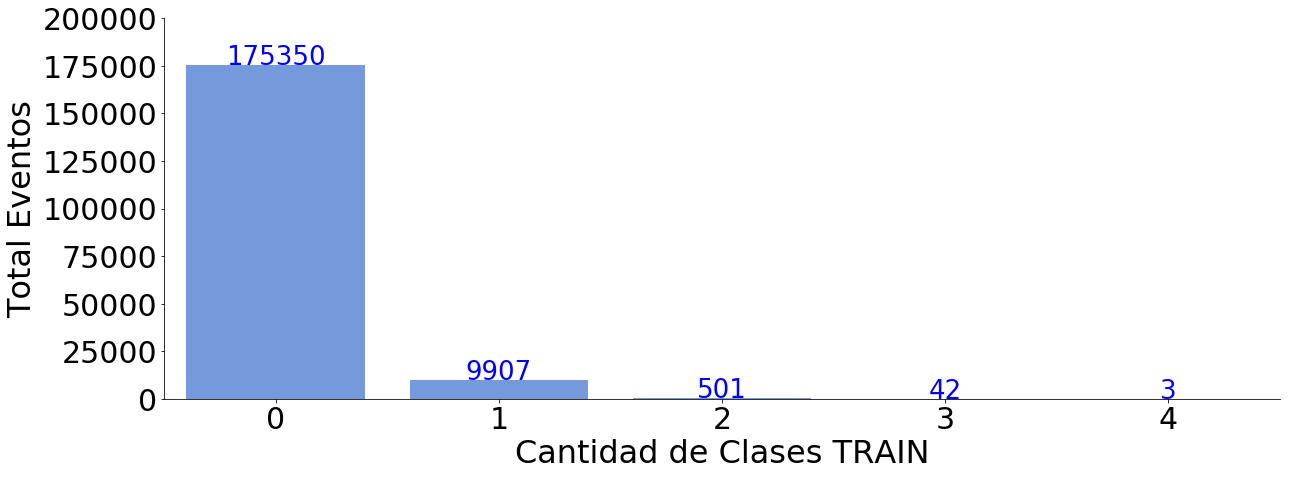

In [29]:
fig =plt.figure(figsize=(20, 7))
g=sns.barplot(x="Clase", y="Cantidad", data=DataClasesTRAIN, color=colorFigura);
plt.xlabel('Cantidad de Clases TRAIN',fontsize=32)
plt.ylabel('Total Eventos',fontsize=32)
#plt.title('Histograma de kWh',fontsize=22)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

sns.despine()

axes = g.axes
axes.set_ylim(0,200000)

for index, row in DataClasesTRAIN.iterrows():
    g.text(row.Clase,row.Cantidad+100, str(row.Cantidad), color='blue', ha="center", fontsize=26)
    
plt.show()

fig.savefig(os.path.join(pathFiguresPDF,'barras_ClasesTRAIN.pdf'))
fig.savefig(os.path.join(pathFiguresPNG,'barras_ClasesTRAIN.png'))

In [30]:
ClasesTEST=dataTEST['CLASE'].value_counts()
DataClasesTEST=pd.DataFrame(columns=['Cantidad'])
DataClasesTEST['Cantidad']=ClasesTEST
DataClasesTEST.reset_index(level=0, inplace=True)
DataClasesTEST.columns=['Clase','Cantidad']
DataClasesTEST = DataClasesTEST.sort_values(by='Clase', ascending=True)
DataClasesTEST

,Clase,Cantidad
0,0,175350
1,1,9907
2,2,502
3,3,42
4,4,3


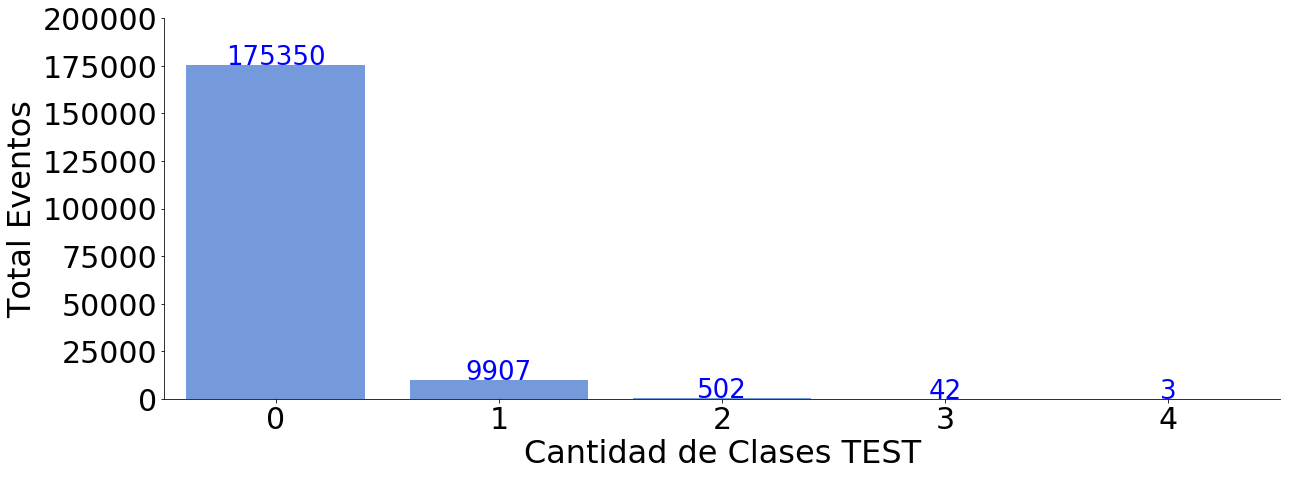

In [31]:
fig =plt.figure(figsize=(20, 7))
g=sns.barplot(x="Clase", y="Cantidad", data=DataClasesTEST, color=colorFigura);
plt.xlabel('Cantidad de Clases TEST',fontsize=32)
plt.ylabel('Total Eventos',fontsize=32)
#plt.title('Histograma de kWh',fontsize=22)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

sns.despine()

axes = g.axes
axes.set_ylim(0,200000)

for index, row in DataClasesTEST.iterrows():
    g.text(row.Clase,row.Cantidad+100, str(row.Cantidad), color='blue', ha="center", fontsize=26)
    
plt.show()

fig.savefig(os.path.join(pathFiguresPDF,'barras_ClasesTEST.pdf'))
fig.savefig(os.path.join(pathFiguresPNG,'barras_ClasesTEST.png'))

# Se grafican las variables del proceso para tener un perspectiva general

In [35]:
estadisticos=data.describe().round(2)
estadisticos

,ID poliza,ANTIG_POL,CANAL,TARIFA,COLEC,CAMPANIA,COEF_MAR_NEG,COEF_MIGRA,TIPO_DNI_TOM,COD_TIPO_VEH,...,CANAL_TARIFA_LA,ESPECIAL_LA,EDAD_O_Modos,EDAD_O_Binario,TIPO_COB6_I,DIF_RC,DIF_DP,PRI_PROP,DIF_REL_PRI,CLASE
count,3.716070e+05,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,...,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00,371607.00
mean,1.248245e+09,4.45,2.42,9.00,4.72,0.24,0.68,1.25,1.12,0.82,...,7.97,0.05,0.31,0.18,0.30,-0.65,-0.48,402.71,0.09,0.06
std,1.187727e+09,3.71,2.07,10.28,9.25,0.78,0.14,0.33,0.46,1.52,...,4.80,0.24,0.70,0.38,0.46,0.57,0.71,152.74,9.70,0.25
min,0.000000e+00,-2.00,0.00,1.00,0.00,0.00,0.10,0.02,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,-0.02,-1.00,0.00
25%,9.059946e+08,2.00,1.00,3.00,0.00,0.00,0.60,1.04,1.00,0.00,...,3.00,0.00,0.00,0.00,0.00,-1.00,-1.00,297.82,0.03,0.00
50%,1.202101e+09,3.00,1.00,5.00,0.00,0.00,0.65,1.16,1.00,0.00,...,6.00,0.00,0.00,0.00,0.00,-1.00,-1.00,364.43,0.09,0.00
75%,1.339992e+09,6.00,5.00,13.00,0.00,0.00,0.75,1.39,1.00,1.00,...,14.00,0.00,0.00,0.00,1.00,0.00,0.00,472.85,0.13,0.00
max,9.908975e+09,31.00,5.00,61.00,27.00,7.00,2.20,7.73,4.00,6.00,...,14.00,2.00,2.00,1.00,1.00,1.00,1.00,3237.22,5914.17,4.00


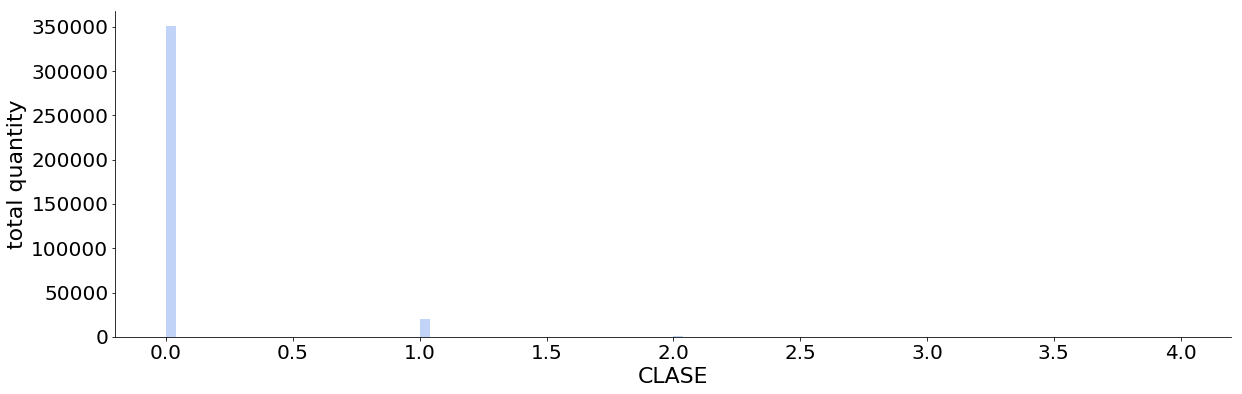

In [36]:
fig =plt.figure(figsize=(20, 6))
sns.distplot(data['CLASE'], kde=False, bins=100,rug=False, color=colorFigura)
plt.xlabel('CLASE',fontsize=22)
plt.ylabel('total quantity',fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

sns.despine()

axes = g.axes
axes.set_ylim(0,400000)

plt.show()

sns_plot.savefig(os.path.join(pathFiguresPDF,'histogram_CLASE.pdf'))
sns_plot.savefig(os.path.join(pathFiguresPNG,'histogram_CLASE.png'))

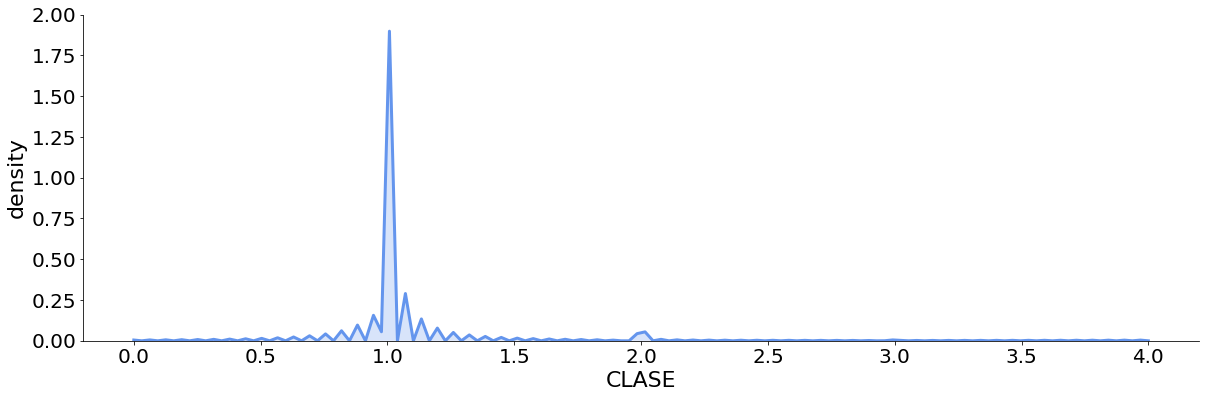

In [37]:
fig =plt.figure(figsize=(20, 6))
g=sns.distplot(data['CLASE'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, color=colorFigura)
plt.xlabel('CLASE',fontsize=22)
plt.ylabel('density',fontsize=22)
#plt.title('Histograma de kWh',fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

sns.despine()

axes = g.axes
axes.set_ylim(0,2)

plt.show()

sns_plot.savefig(os.path.join(pathFiguresPDF,'density_CLASE.pdf'))
sns_plot.savefig(os.path.join(pathFiguresPNG,'density_CLASE.png'))